<h1>Capstone 1</h1>
<h2>Wine Quality, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>
<h4>October 19, 2020</h4>
<h2>Import Python Packages</h2>

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [2]:
#Import csv files into Pandas data frames
reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")


In [3]:
#Add 'wine type' column to each data frame and population with 'red' or 'white' for each
reddf['wine type'] = 'red'
whitedf['wine type'] = 'white'

In [4]:
#Look at the first few records of combined red wine dataframe with new column
reddf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
#Look at the first few records of combined white wine dataframe with new column
whitedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [6]:
#combine the two dataframes for red and white wine into one data frame for all wines
winedf = reddf.append(whitedf, ignore_index=True)
df = winedf
df = df.drop(['wine type'],axis=1)
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)


In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h2>Identifying and Removing Outliers</h2>
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed data are positively skewed, we only need to eliminate those values.</p>

In [8]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ValueList = ('fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
            'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = df[df[myValue] >= gtdropvalue].index
    index_names_left = df[df[myValue] <= ltdropvalue].index
    df.drop(index_names_right, inplace = True)
    df.drop(index_names_left, inplace = True)
    
    
   

In [9]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,6.911399,0.283726,0.319456,5.927825,0.044523,33.056393,129.974645,0.993998,3.200975,0.493718,10.589092,5.917596
std,0.831594,0.100837,0.088763,4.735945,0.012686,15.352960,46.714524,0.002817,0.143386,0.108575,1.212198,0.865701
min,4.700000,0.080000,0.090000,0.600000,0.012000,2.000000,8.000000,0.987110,2.820000,0.220000,8.400000,3.000000
25%,6.400000,0.210000,0.260000,1.800000,0.036000,22.000000,101.000000,0.991705,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.270000,0.310000,4.600000,0.043000,32.000000,128.000000,0.993880,3.190000,0.480000,10.500000,6.000000
75%,7.400000,0.330000,0.370000,8.900000,0.051000,44.000000,162.000000,0.996100,3.300000,0.560000,11.400000,6.000000
max,9.600000,0.640000,0.550000,18.950000,0.081000,78.000000,253.000000,1.001820,3.590000,0.790000,14.200000,9.000000


### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [10]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
sm.__version__

'0.12.0'

## Model 1


In [12]:
ym1 = df.quality
Xm1 = df.drop(['quality'],axis=1)
from sklearn.model_selection import train_test_split
Xm1_train, Xm1_test, ym1_train, ym1_test = train_test_split(Xm1, ym1, test_size=0.25, random_state=101)
Xm1_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4270,5.9,0.30,0.30,2.00,0.030,38.0,142.0,0.98892,3.41,0.41,12.9
2581,5.1,0.39,0.21,1.70,0.027,15.0,72.0,0.98940,3.50,0.45,12.5
5030,7.1,0.18,0.39,15.25,0.047,45.0,158.0,0.99946,3.34,0.77,9.1
2764,6.0,0.24,0.32,6.30,0.030,34.0,129.0,0.99460,3.52,0.41,10.4
4980,6.9,0.19,0.35,6.90,0.045,51.0,125.0,0.99330,3.10,0.44,10.7


In [13]:
Xm1_train.shape

(3431, 11)

In [14]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(Xm1_train,ym1_train)
print('Estimated intercept coefficient:',lm1.intercept_)
print ('Number of coefficients:', len(lm1.coef_))
coeffm1_df = pd.DataFrame(lm1.coef_,Xm1.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: 78.03837340125014
Number of coefficients: 11


,Coefficient
fixed_acidity,0.079646
volatile_acidity,-1.443108
citric_acid,-0.112080
residual_sugar,0.053362
chlorides,-0.458938
free_sulfur_dioxide,0.006804
total_sulfur_dioxide,-0.001857
density,-77.919321
pH,0.574477
sulphates,0.703729


In [15]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym1, Xm1 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm1 = pd.DataFrame()
vifm1['VIF'] = [variance_inflation_factor(Xm1.values, i) for i in range(Xm1.shape[1])]
vifm1['variable'] = Xm1.columns

#view VIF for each explanatory variable 
vifm1

,VIF,variable
0,3.419784e+06,Intercept
1,3.127336e+00,fixed_acidity
2,1.331701e+00,volatile_acidity
3,1.201738e+00,citric_acid
4,1.140033e+01,residual_sugar
5,2.099465e+00,chlorides
6,1.870551e+00,free_sulfur_dioxide
7,2.138350e+00,total_sulfur_dioxide
8,2.806681e+01,density
9,2.377965e+00,pH


In [16]:
predictions_m1 = lm1.predict(Xm1_test)

**Predicted vs. Actual**

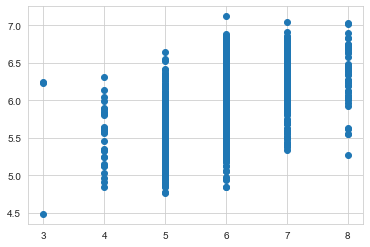

In [17]:
plt.scatter(ym1_test,predictions_m1)

**Residual Histogram**

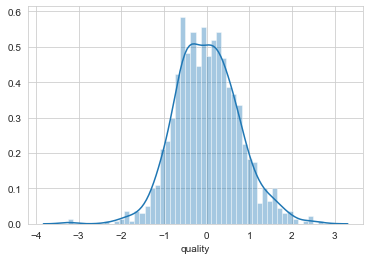

In [18]:
sns.distplot((ym1_test-predictions_m1),bins=50);

In [19]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym1_test, predictions_m1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym1_test, predictions_m1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym1_test, predictions_m1)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym1_test, predictions_m1))
print('Explained Variance:', metrics.explained_variance_score(ym1_test, predictions_m1))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym1_test, predictions_m1))
print('Median Absolute Error:', metrics.median_absolute_error(ym1_test, predictions_m1))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym1_test, predictions_m1))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym1_test, predictions_m1))



R-squared: 0.2549976810768839
Mean Squared Error (MSE): 0.5579542152846801
Root Mean Squared Error (RMSE): 0.7469633292770671
Log Mean Squared Error: 0.011922028927652017
Explained Variance: 0.2551465644505574
Mean Absolute Error (MAE): 0.5886779198290218
Median Absolute Error: 0.5041614874898102
Poisson Deviance: 0.09447558501421136
Mean Gamma Deviance: 0.016240575187315365


## Backward Elimination Method to create subsequent models

## Model 2 -  Drop Fixed Acidity

In [20]:
ym2 = df.quality
Xm2 = df.drop(['quality','fixed_acidity'],axis=1)
from sklearn.model_selection import train_test_split
Xm2_train, Xm2_test, ym2_train, ym2_test = train_test_split(Xm2, ym2, test_size=0.25, random_state=101)
Xm2_train.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4270,0.30,0.30,2.00,0.030,38.0,142.0,0.98892,3.41,0.41,12.9
2581,0.39,0.21,1.70,0.027,15.0,72.0,0.98940,3.50,0.45,12.5
5030,0.18,0.39,15.25,0.047,45.0,158.0,0.99946,3.34,0.77,9.1
2764,0.24,0.32,6.30,0.030,34.0,129.0,0.99460,3.52,0.41,10.4
4980,0.19,0.35,6.90,0.045,51.0,125.0,0.99330,3.10,0.44,10.7


In [21]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(Xm2_train,ym2_train)
print('Estimated intercept coefficient:',lm2.intercept_)
print ('Number of coefficients:', len(lm2.coef_))
coeffm2_df = pd.DataFrame(lm2.coef_,Xm2.columns,columns=['Coefficient'])
coeffm2_df

Estimated intercept coefficient: 25.7313040392005
Number of coefficients: 10


,Coefficient
volatile_acidity,-1.500740
citric_acid,-0.051040
residual_sugar,0.034007
chlorides,-1.520752
free_sulfur_dioxide,0.006711
total_sulfur_dioxide,-0.001790
density,-24.283702
pH,0.299981
sulphates,0.611738
alcohol,0.319065


In [22]:
predictions_m2 = lm2.predict(Xm2_test)

**Predicted vs. Actual**

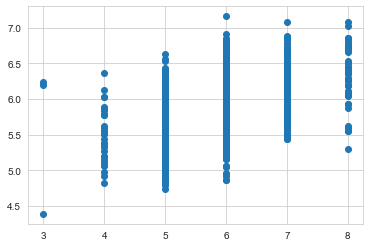

In [23]:
plt.scatter(ym2_test,predictions_m2)

**Residual Histogram**

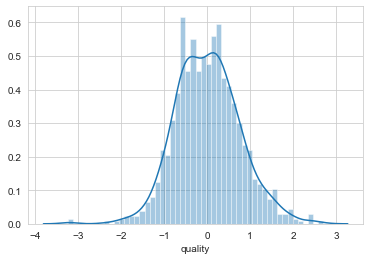

In [24]:
sns.distplot((ym2_test-predictions_m2),bins=50);

In [25]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym2_test, predictions_m2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym2_test, predictions_m2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym2_test, predictions_m2)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym2_test, predictions_m2))
print('Explained Variance:', metrics.explained_variance_score(ym2_test, predictions_m2))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym2_test, predictions_m2))
print('Median Absolute Error:', metrics.median_absolute_error(ym2_test, predictions_m2))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym2_test, predictions_m2))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym2_test, predictions_m2))



R-squared: 0.2549037670123607
Mean Squared Error (MSE): 0.5580245502982019
Root Mean Squared Error (RMSE): 0.7470104084269521
Log Mean Squared Error: 0.01190818434179211
Explained Variance: 0.255034287989681
Mean Absolute Error (MAE): 0.589624153887461
Median Absolute Error: 0.5086450629079717
Poisson Deviance: 0.09443567987813038
Mean Gamma Deviance: 0.016224139905704895


## Model 3: Drop Total Sulfur Dioxide


In [26]:
ym3 = df.quality
Xm3 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm3_train, Xm3_test, ym3_train, ym3_test = train_test_split(Xm3, ym3, test_size=0.25, random_state=101)
Xm3_train.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol
4270,0.30,0.30,2.00,0.030,38.0,0.98892,3.41,0.41,12.9
2581,0.39,0.21,1.70,0.027,15.0,0.98940,3.50,0.45,12.5
5030,0.18,0.39,15.25,0.047,45.0,0.99946,3.34,0.77,9.1
2764,0.24,0.32,6.30,0.030,34.0,0.99460,3.52,0.41,10.4
4980,0.19,0.35,6.90,0.045,51.0,0.99330,3.10,0.44,10.7


In [27]:
Xm3_train.shape

(3431, 9)

In [28]:
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(Xm3_train,ym3_train)
print('Estimated intercept coefficient:',lm3.intercept_)
print ('Number of coefficients:', len(lm3.coef_))
coeffm1_df = pd.DataFrame(lm3.coef_,Xm3.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: 19.42417454655243
Number of coefficients: 9


,Coefficient
volatile_acidity,-1.552573
citric_acid,-0.143117
residual_sugar,0.029685
chlorides,-0.938988
free_sulfur_dioxide,0.003812
density,-18.259932
pH,0.286710
sulphates,0.607825
alcohol,0.344621


In [29]:
predictions_m3 = lm3.predict(Xm3_test)

**Predicted vs. Actual**

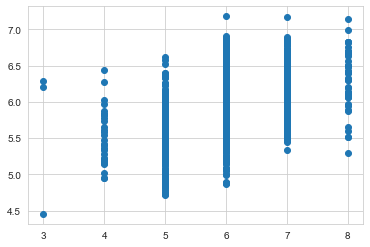

In [30]:
plt.scatter(ym3_test,predictions_m3)

**Residual Histogram**

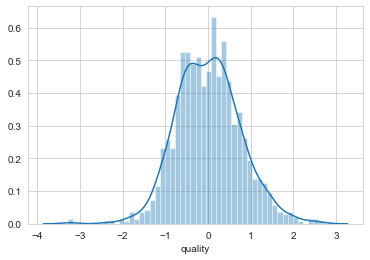

In [31]:
sns.distplot((ym3_test-predictions_m3),bins=50);

In [32]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym3_test, predictions_m3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym3_test, predictions_m3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym3_test, predictions_m3)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym3_test, predictions_m3))
print('Explained Variance:', metrics.explained_variance_score(ym3_test, predictions_m3))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym3_test, predictions_m3))
print('Median Absolute Error:', metrics.median_absolute_error(ym3_test, predictions_m3))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym3_test, predictions_m3))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym3_test, predictions_m3))



R-squared: 0.24664378136323917
Mean Squared Error (MSE): 0.5642106972323218
Root Mean Squared Error (RMSE): 0.7511395990309137
Log Mean Squared Error: 0.01205470359982559
Explained Variance: 0.24680611281540776
Mean Absolute Error (MAE): 0.5942271699284737
Median Absolute Error: 0.49508005496597374
Poisson Deviance: 0.0955194038546072
Mean Gamma Deviance: 0.016416176970753496


## Model 4: Drop Free Sulfur Dioxide

In [33]:
ym4 = df.quality
Xm4 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide'],axis=1)
from sklearn.model_selection import train_test_split
Xm4_train, Xm4_test, ym4_train, ym4_test = train_test_split(Xm4, ym4, test_size=0.25, random_state=101)
Xm4_train.head()


,volatile_acidity,citric_acid,residual_sugar,chlorides,density,pH,sulphates,alcohol
4270,0.30,0.30,2.00,0.030,0.98892,3.41,0.41,12.9
2581,0.39,0.21,1.70,0.027,0.98940,3.50,0.45,12.5
5030,0.18,0.39,15.25,0.047,0.99946,3.34,0.77,9.1
2764,0.24,0.32,6.30,0.030,0.99460,3.52,0.41,10.4
4980,0.19,0.35,6.90,0.045,0.99330,3.10,0.44,10.7


In [34]:
Xm4_train.shape

(3431, 8)

In [35]:
lm4 = LinearRegression()
lm4.fit(Xm4_train,ym4_train)
print('Estimated intercept coefficient:',lm4.intercept_)
print ('Number of coefficients:', len(lm4.coef_))
coeffm4_df = pd.DataFrame(lm4.coef_,Xm4.columns,columns=['Coefficient'])
coeffm4_df

Estimated intercept coefficient: 30.16667446876402
Number of coefficients: 8


,Coefficient
volatile_acidity,-1.608783
citric_acid,-0.084009
residual_sugar,0.037330
chlorides,-0.915409
density,-28.922355
pH,0.318305
sulphates,0.642999
alcohol,0.327052


In [36]:
predictions_m4 = lm4.predict(Xm4_test)

**Predicted vs. Actual**

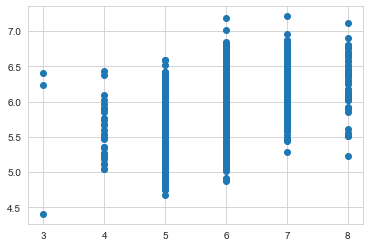

In [37]:
plt.scatter(ym1_test,predictions_m4)

**Residual Histogram**

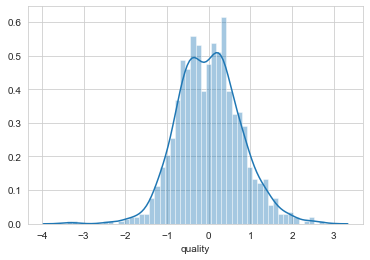

In [38]:
sns.distplot((ym4_test-predictions_m4),bins=50);

In [39]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym4_test, predictions_m4))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym4_test, predictions_m4))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym4_test, predictions_m4)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym4_test, predictions_m4))
print('Explained Variance:', metrics.explained_variance_score(ym4_test, predictions_m4))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym4_test, predictions_m4))
print('Median Absolute Error:', metrics.median_absolute_error(ym4_test, predictions_m4))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym4_test, predictions_m4))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym4_test, predictions_m4))

R-squared: 0.23817487948249505
Mean Squared Error (MSE): 0.5705533076956338
Root Mean Squared Error (RMSE): 0.75534979161686
Log Mean Squared Error: 0.012178049111184416
Explained Variance: 0.23835540412237544
Mean Absolute Error (MAE): 0.59700227001723
Median Absolute Error: 0.48565366340282345
Poisson Deviance: 0.09648942571635435
Mean Gamma Deviance: 0.01656390914521041


## Model 5: Drop Residual Sugar


In [40]:
ym5 = df.quality
Xm5 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar'],axis=1)
from sklearn.model_selection import train_test_split
Xm5_train, Xm5_test, ym5_train, ym5_test = train_test_split(Xm5, ym5, test_size=0.25, random_state=101)
Xm5_train.head()




,volatile_acidity,citric_acid,chlorides,density,pH,sulphates,alcohol
4270,0.30,0.30,0.030,0.98892,3.41,0.41,12.9
2581,0.39,0.21,0.027,0.98940,3.50,0.45,12.5
5030,0.18,0.39,0.047,0.99946,3.34,0.77,9.1
2764,0.24,0.32,0.030,0.99460,3.52,0.41,10.4
4980,0.19,0.35,0.045,0.99330,3.10,0.44,10.7


In [41]:
Xm5_train.shape

(3431, 7)

In [42]:
from sklearn.linear_model import LinearRegression
lm5 = LinearRegression()
lm5.fit(Xm5_train,ym5_train)
print('Estimated intercept coefficient:',lm5.intercept_)
print ('Number of coefficients:', len(lm5.coef_))
coeffm5_df = pd.DataFrame(lm5.coef_,Xm5.columns,columns=['Coefficient'])
coeffm5_df

Estimated intercept coefficient: -51.097680147417265
Number of coefficients: 7


,Coefficient
volatile_acidity,-1.788722
citric_acid,-0.258234
chlorides,-4.910716
density,53.431876
pH,0.089551
sulphates,0.406292
alcohol,0.398742


In [43]:
predictions_m5 = lm5.predict(Xm5_test)

**Predicted vs. Actual**

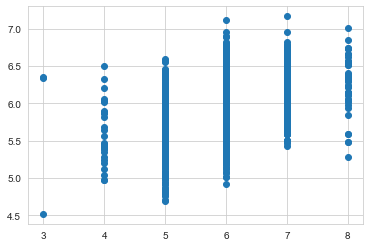

In [44]:
plt.scatter(ym5_test,predictions_m5)

**Residual Histogram**

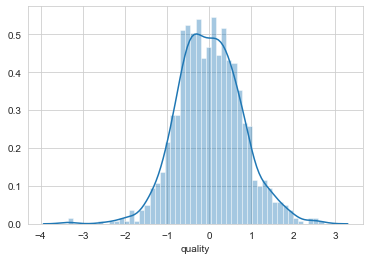

In [45]:
sns.distplot((ym5_test-predictions_m5),bins=50);

In [46]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym5_test, predictions_m5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym5_test, predictions_m5))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym5_test, predictions_m5)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym5_test, predictions_m5))
print('Explained Variance:', metrics.explained_variance_score(ym5_test, predictions_m5))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym5_test, predictions_m5))
print('Median Absolute Error:', metrics.median_absolute_error(ym5_test, predictions_m5))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym5_test, predictions_m5))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym5_test, predictions_m5))



R-squared: 0.22335776462229617
Mean Squared Error (MSE): 0.5816502821407005
Root Mean Squared Error (RMSE): 0.7626600042880841
Log Mean Squared Error: 0.012399855784439211
Explained Variance: 0.22357476822890143
Mean Absolute Error (MAE): 0.600971821683098
Median Absolute Error: 0.5007417334916759
Poisson Deviance: 0.09823741750802316
Mean Gamma Deviance: 0.01683869495533333



## Model 6: Drop Alcohol



In [47]:
ym6 = df.quality
Xm6 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol'],axis=1)
from sklearn.model_selection import train_test_split
Xm6_train, Xm6_test, ym6_train, ym6_test = train_test_split(Xm6, ym6, test_size=0.25, random_state=101)
Xm6_train.head()


,volatile_acidity,citric_acid,chlorides,density,pH,sulphates
4270,0.30,0.30,0.030,0.98892,3.41,0.41
2581,0.39,0.21,0.027,0.98940,3.50,0.45
5030,0.18,0.39,0.047,0.99946,3.34,0.77
2764,0.24,0.32,0.030,0.99460,3.52,0.41
4980,0.19,0.35,0.045,0.99330,3.10,0.44


In [48]:
Xm6_train.shape

(3431, 6)

In [49]:
from sklearn.linear_model import LinearRegression
lm6 = LinearRegression()
lm6.fit(Xm6_train,ym6_train)
print('Estimated intercept coefficient:',lm6.intercept_)
print ('Number of coefficients:', len(lm6.coef_))
coeffm6_df = pd.DataFrame(lm6.coef_,Xm6.columns,columns=['Coefficient'])
coeffm6_df


Estimated intercept coefficient: 80.86714028505408
Number of coefficients: 6


,Coefficient
volatile_acidity,-0.977431
citric_acid,0.266703
chlorides,-9.872486
density,-76.112579
pH,0.314629
sulphates,0.666280


In [50]:
predictions_m6 = lm6.predict(Xm6_test)

**Predicted vs. Actual**

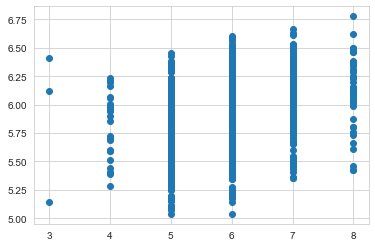

In [51]:
plt.scatter(ym6_test,predictions_m6)

**Residual Histogram**

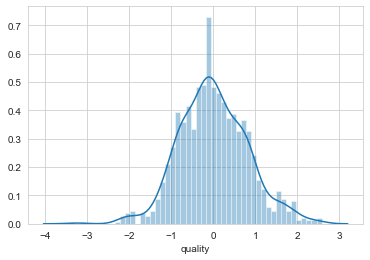

In [52]:
sns.distplot((ym6_test-predictions_m6),bins=50);

In [53]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym6_test, predictions_m6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym6_test, predictions_m6))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym6_test, predictions_m6)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym6_test, predictions_m6))
print('Explained Variance:', metrics.explained_variance_score(ym6_test, predictions_m6))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym6_test, predictions_m6))
print('Median Absolute Error:', metrics.median_absolute_error(ym6_test, predictions_m6))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym6_test, predictions_m6))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym6_test, predictions_m6))



R-squared: 0.13117847174571895
Mean Squared Error (MSE): 0.6506860739980881
Root Mean Squared Error (RMSE): 0.8066511476456771
Log Mean Squared Error: 0.013953142119962058
Explained Variance: 0.13124700818290025
Mean Absolute Error (MAE): 0.631115957911271
Median Absolute Error: 0.5411208437159516
Poisson Deviance: 0.11033184446634879
Mean Gamma Deviance: 0.01896313787783527


## Model 7: Drop Citric Acid

In [54]:
ym7 = df.quality
Xm7 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid'],axis=1)
from sklearn.model_selection import train_test_split
Xm7_train, Xm7_test, ym7_train, ym7_test = train_test_split(Xm7, ym7, test_size=0.25, random_state=101)
Xm7_train.head()


,volatile_acidity,chlorides,density,pH,sulphates
4270,0.30,0.030,0.98892,3.41,0.41
2581,0.39,0.027,0.98940,3.50,0.45
5030,0.18,0.047,0.99946,3.34,0.77
2764,0.24,0.030,0.99460,3.52,0.41
4980,0.19,0.045,0.99330,3.10,0.44


In [55]:
Xm7_train.shape

(3431, 5)

In [56]:
from sklearn.linear_model import LinearRegression
lm7 = LinearRegression()
lm7.fit(Xm7_train,ym7_train)
print('Estimated intercept coefficient:',lm7.intercept_)
print ('Number of coefficients:', len(lm7.coef_))
coeffm7_df = pd.DataFrame(lm7.coef_,Xm7.columns,columns=['Coefficient'])
coeffm7_df

Estimated intercept coefficient: 80.60320629080465
Number of coefficients: 5


,Coefficient
volatile_acidity,-1.028518
chlorides,-9.980225
density,-75.686922
pH,0.294072
sulphates,0.688499


In [57]:
predictions_m7 = lm7.predict(Xm7_test)

**Predicted vs. Actual**

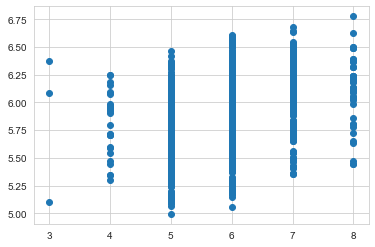

In [58]:
plt.scatter(ym7_test,predictions_m7)

**Residual Histogram**

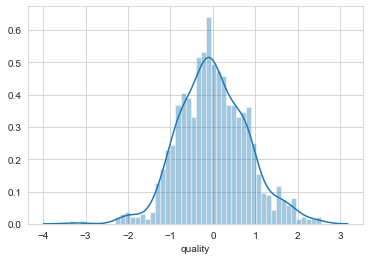

In [59]:
sns.distplot((ym7_test-predictions_m7),bins=50);

In [60]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym7_test, predictions_m7))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym7_test, predictions_m7))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym7_test, predictions_m7)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym7_test, predictions_m7))
print('Explained Variance:', metrics.explained_variance_score(ym7_test, predictions_m7))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym7_test, predictions_m7))
print('Median Absolute Error:', metrics.median_absolute_error(ym7_test, predictions_m7))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym7_test, predictions_m7))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym7_test, predictions_m7))


R-squared: 0.13080627686643165
Mean Squared Error (MSE): 0.6509648217234723
Root Mean Squared Error (RMSE): 0.8068239099849931
Log Mean Squared Error: 0.013951104878579201
Explained Variance: 0.13088707658651733
Mean Absolute Error (MAE): 0.6318302501166965
Median Absolute Error: 0.5414446355160791
Poisson Deviance: 0.11036277109820086
Mean Gamma Deviance: 0.018965267992389883


## Model 8: Drop pH

In [61]:
ym8 = df.quality
Xm8 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH'],axis=1)
from sklearn.model_selection import train_test_split
Xm8_train, Xm8_test, ym8_train, ym8_test = train_test_split(Xm8, ym8, test_size=0.25, random_state=101)
Xm8_train.head()

,volatile_acidity,chlorides,density,sulphates
4270,0.30,0.030,0.98892,0.41
2581,0.39,0.027,0.98940,0.45
5030,0.18,0.047,0.99946,0.77
2764,0.24,0.030,0.99460,0.41
4980,0.19,0.045,0.99330,0.44


In [62]:
Xm8_train.shape

(3431, 4)

In [63]:
from sklearn.linear_model import LinearRegression
lm8 = LinearRegression()
lm8.fit(Xm8_train,ym8_train)
print('Estimated intercept coefficient:',lm8.intercept_)
print ('Number of coefficients:', len(lm8.coef_))
coeffm8_df = pd.DataFrame(lm8.coef_,Xm8.columns,columns=['Coefficient'])
coeffm8_df

Estimated intercept coefficient: 83.14890536954475
Number of coefficients: 4


,Coefficient
volatile_acidity,-1.002222
chlorides,-9.526898
density,-77.371337
sulphates,0.773184


In [64]:
predictions_m8 = lm8.predict(Xm8_test)

**Predicted vs. Actual**

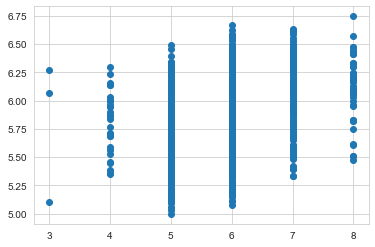

In [65]:
plt.scatter(ym8_test,predictions_m8)

**Residual Histogram**

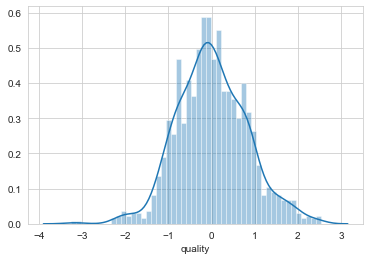

In [66]:
sns.distplot((ym8_test-predictions_m8),bins=50);

In [67]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym8_test, predictions_m8))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym8_test, predictions_m8))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym8_test, predictions_m8)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym8_test, predictions_m8))
print('Explained Variance:', metrics.explained_variance_score(ym8_test, predictions_m8))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym8_test, predictions_m8))
print('Median Absolute Error:', metrics.median_absolute_error(ym8_test, predictions_m8))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym8_test, predictions_m8))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym8_test, predictions_m8))


R-squared: 0.12314229266823651
Mean Squared Error (MSE): 0.6567046055880906
Root Mean Squared Error (RMSE): 0.8103731273852129
Log Mean Squared Error: 0.014057727845667115
Explained Variance: 0.12326674204350685
Mean Absolute Error (MAE): 0.6349065021191294
Median Absolute Error: 0.5492100269930091
Poisson Deviance: 0.11128222116100935
Mean Gamma Deviance: 0.019112477930210713


## Model 9: Drop Sulphates

In [68]:
ym9 = df.quality
Xm9 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH','sulphates'],axis=1)
from sklearn.model_selection import train_test_split
Xm9_train, Xm9_test, ym9_train, ym9_test = train_test_split(Xm9, ym9, test_size=0.25, random_state=101)
Xm9_train.head()


,volatile_acidity,chlorides,density
4270,0.30,0.030,0.98892
2581,0.39,0.027,0.98940
5030,0.18,0.047,0.99946
2764,0.24,0.030,0.99460
4980,0.19,0.045,0.99330


In [69]:
Xm9_train.shape

(3431, 3)

In [70]:
from sklearn.linear_model import LinearRegression
lm9 = LinearRegression()
lm9.fit(Xm9_train,ym9_train)
print('Estimated intercept coefficient:',lm9.intercept_)
print ('Number of coefficients:', len(lm9.coef_))
coeffm9_df = pd.DataFrame(lm9.coef_,Xm9.columns,columns=['Coefficient'])
coeffm9_df


Estimated intercept coefficient: 82.0954270054022
Number of coefficients: 3


,Coefficient
volatile_acidity,-0.961505
chlorides,-8.181839
density,-76.000206


In [71]:
predictions_m9 = lm9.predict(Xm9_test)

**Predicted vs. Actual**

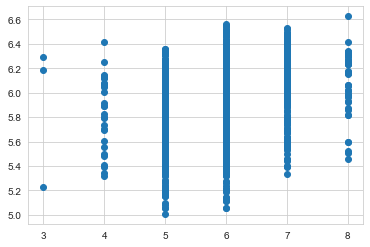

In [72]:
plt.scatter(ym9_test,predictions_m9)

**Residual Histogram**

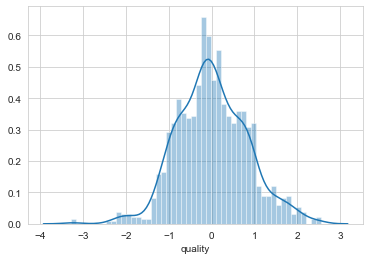

In [73]:
sns.distplot((ym9_test-predictions_m9),bins=50);

In [74]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym9_test, predictions_m9))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym9_test, predictions_m9))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym9_test, predictions_m9)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym9_test, predictions_m9))
print('Explained Variance:', metrics.explained_variance_score(ym9_test, predictions_m9))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym9_test, predictions_m9))
print('Median Absolute Error:', metrics.median_absolute_error(ym9_test, predictions_m9))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym9_test, predictions_m9))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym9_test, predictions_m9))


R-squared: 0.10552248173769518
Mean Squared Error (MSE): 0.669900601803814
Root Mean Squared Error (RMSE): 0.818474557823158
Log Mean Squared Error: 0.014342693679084466
Explained Variance: 0.10575342576726321
Mean Absolute Error (MAE): 0.6394537723662221
Median Absolute Error: 0.5577989585399195
Poisson Deviance: 0.1135335420020473
Mean Gamma Deviance: 0.019498007077482754


## Model 10: Drop Volatile Acidity

In [75]:
ym10 = df.quality
Xm10 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH','sulphates'],axis=1)
from sklearn.model_selection import train_test_split
Xm10_train, Xm10_test, ym10_train, ym10_test = train_test_split(Xm10, ym10, test_size=0.25, random_state=101)
Xm10_train.head()


,volatile_acidity,chlorides,density
4270,0.30,0.030,0.98892
2581,0.39,0.027,0.98940
5030,0.18,0.047,0.99946
2764,0.24,0.030,0.99460
4980,0.19,0.045,0.99330


In [76]:
Xm10_train.shape

(3431, 3)

In [77]:
from sklearn.linear_model import LinearRegression
lm10 = LinearRegression()
lm10.fit(Xm10_train,ym10_train)
print('Estimated intercept coefficient:',lm10.intercept_)
print ('Number of coefficients:', len(lm10.coef_))
coeffm10_df = pd.DataFrame(lm10.coef_,Xm10.columns,columns=['Coefficient'])
coeffm10_df

Estimated intercept coefficient: 82.0954270054022
Number of coefficients: 3


,Coefficient
volatile_acidity,-0.961505
chlorides,-8.181839
density,-76.000206


In [78]:
predictions_m10 = lm10.predict(Xm10_test)

**Predicted vs. Actual**

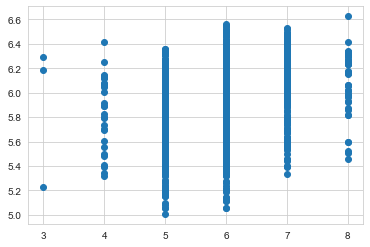

In [79]:
plt.scatter(ym10_test,predictions_m10)

**Residual Histogram**

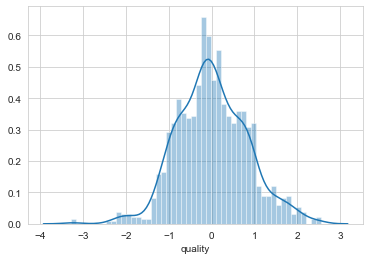

In [80]:
sns.distplot((ym10_test-predictions_m10),bins=50);

In [81]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym10_test, predictions_m10))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym10_test, predictions_m10))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym10_test, predictions_m10)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym10_test, predictions_m10))
print('Explained Variance:', metrics.explained_variance_score(ym10_test, predictions_m10))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym10_test, predictions_m10))
print('Median Absolute Error:', metrics.median_absolute_error(ym10_test, predictions_m10))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym10_test, predictions_m10))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym10_test, predictions_m10))

R-squared: 0.10552248173769518
Mean Squared Error (MSE): 0.669900601803814
Root Mean Squared Error (RMSE): 0.818474557823158
Log Mean Squared Error: 0.014342693679084466
Explained Variance: 0.10575342576726321
Mean Absolute Error (MAE): 0.6394537723662221
Median Absolute Error: 0.5577989585399195
Poisson Deviance: 0.1135335420020473
Mean Gamma Deviance: 0.019498007077482754


## Model 11: Drop Chlorides

In [82]:
ym11 = df.quality
Xm11 = df.drop(['quality','fixed_acidity','total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','alcohol','residual_sugar','citric_acid','pH','sulphates','chlorides'],axis=1)
from sklearn.model_selection import train_test_split
Xm11_train, Xm11_test, ym11_train, ym11_test = train_test_split(Xm11, ym11, test_size=0.25, random_state=101)
Xm11_train.head()


,volatile_acidity,density
4270,0.30,0.98892
2581,0.39,0.98940
5030,0.18,0.99946
2764,0.24,0.99460
4980,0.19,0.99330


In [83]:
Xm11_train.shape

(3431, 2)

In [84]:
from sklearn.linear_model import LinearRegression
lm11 = LinearRegression()
lm11.fit(Xm11_train,ym11_train)
print('Estimated intercept coefficient:',lm11.intercept_)
print ('Number of coefficients:', len(lm11.coef_))
coeffm11_df = pd.DataFrame(lm11.coef_,Xm11.columns,columns=['Coefficient'])
coeffm11_df

Estimated intercept coefficient: 99.31449613340011
Number of coefficients: 2


,Coefficient
volatile_acidity,-1.210667
density,-93.617791


In [85]:
predictions_m11 = lm11.predict(Xm11_test)

**Predicted vs. Actual**

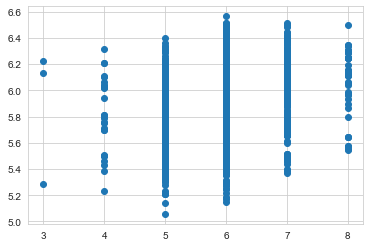

In [86]:
plt.scatter(ym11_test,predictions_m11)

**Residual Histogram**

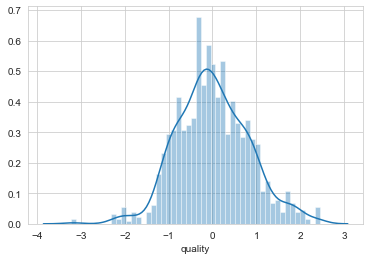

In [87]:
sns.distplot((ym11_test-predictions_m11),bins=50);

In [88]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym11_test, predictions_m11))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym11_test, predictions_m11))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym11_test, predictions_m11)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym11_test, predictions_m11))
print('Explained Variance:', metrics.explained_variance_score(ym11_test, predictions_m11))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym11_test, predictions_m11))
print('Median Absolute Error:', metrics.median_absolute_error(ym11_test, predictions_m11))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym11_test, predictions_m11))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym11_test, predictions_m11))

R-squared: 0.09845051528964988
Mean Squared Error (MSE): 0.6751970061099675
Root Mean Squared Error (RMSE): 0.8217037216113648
Log Mean Squared Error: 0.014428855255682547
Explained Variance: 0.09858129646831804
Mean Absolute Error (MAE): 0.6454249725828806
Median Absolute Error: 0.5532979047253264
Poisson Deviance: 0.11432717558409035
Mean Gamma Deviance: 0.01961443806397119
